In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

data = pd.read_csv('/content/framingham.csv')
data.head()

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [2]:
missing_valus = data.isna().sum().sort_values(ascending=False)
missing_valus

,0
glucose,388
education,105
BPMeds,53
totChol,50
cigsPerDay,29
BMI,19
heartRate,1
male,0
age,0
currentSmoker,0


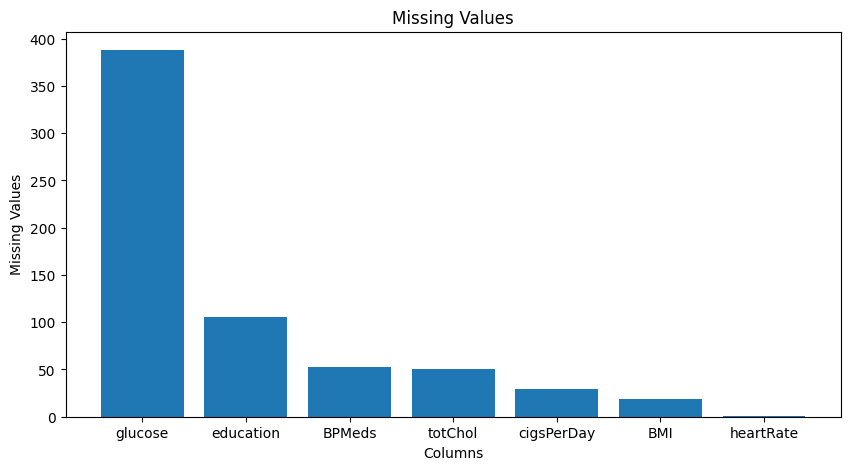

In [3]:
missing_valus = missing_valus[missing_valus > 0]
plt.figure(figsize=(10, 5))
plt.bar(missing_valus.index, missing_valus.values)
plt.title("Missing Values")
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.show()


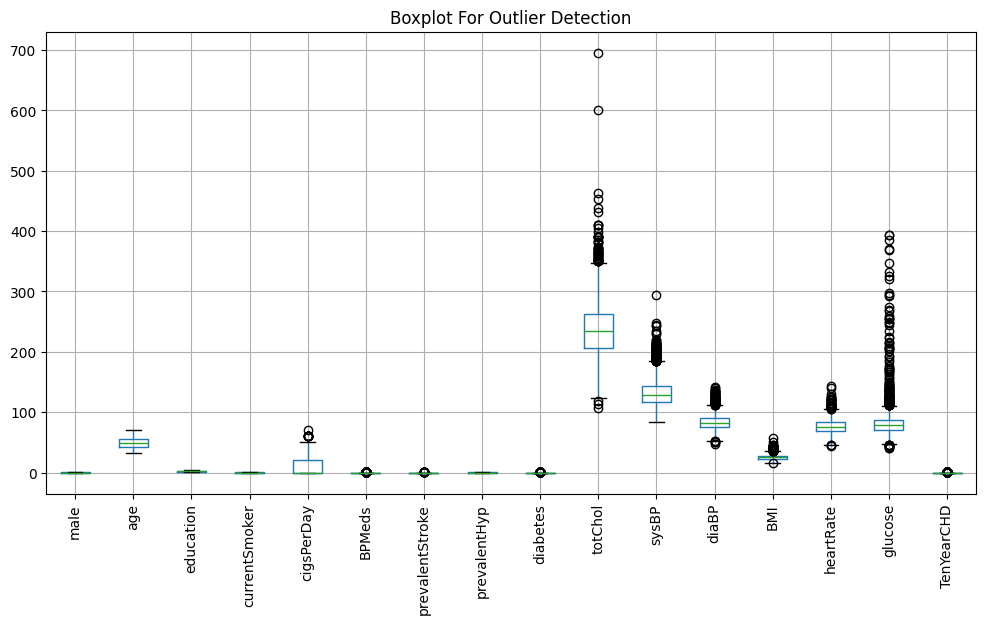

In [4]:
plt.figure(figsize=(12, 6))
data.boxplot(column=['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
                     'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
                     'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'])
plt.title("Boxplot For Outlier Detection")
plt.xticks(rotation=90)
plt.show()


PANDAS PROFILIER BURADA ÇALIŞTIRAMADIM O YÜZDEN KENDİM AYRI OLARAK KONTROL EDİP AŞAĞIDA BULUNAN İŞLEMİ GERÇEKLEŞTİRDİM

In [7]:
cleaned_df = data.drop(columns=['education', 'diabetes', 'diaBP', 'currentSmoker'])
cleaned_df.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,1,225.0,150.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,285.0,130.0,23.10,85.0,85.0,0


In [9]:
def impute_with_median(df):
    # DataFrame'in kopyasını oluşturuyoruz, böylece orijinal veri seti değişmez.
    df = df.copy()
    # Sadece sayısal sütunlar için işlemi gerçekleştiriyoruz.
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
    return df

# Kullanım örneği:
cleaned_df = impute_with_median(cleaned_df)

<ipython-input-9-2ef2e60c5efe>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


In [11]:
missing_valus = cleaned_df.isna().sum().sort_values(ascending=False)
missing_valus

,0
male,0
age,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
totChol,0
sysBP,0
BMI,0
heartRate,0


In [12]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   float64
 1   age              4238 non-null   float64
 2   cigsPerDay       4238 non-null   float64
 3   BPMeds           4238 non-null   float64
 4   prevalentStroke  4238 non-null   float64
 5   prevalentHyp     4238 non-null   float64
 6   totChol          4238 non-null   float64
 7   sysBP            4238 non-null   float64
 8   BMI              4238 non-null   float64
 9   heartRate        4238 non-null   float64
 10  glucose          4238 non-null   float64
 11  TenYearCHD       4238 non-null   float64
dtypes: float64(12)
memory usage: 397.4 KB


In [13]:
# Giriş verileri: Son sütun hariç tüm sütunlar
X = cleaned_df.iloc[:, :-1].values
# Hedef veri: Son sütun (TenYearCHD)
y = cleaned_df.iloc[:, -1].values

# İstediğiniz indeks aralıklarını kullanarak train ve test setlerini ayıralım:
# Örneğin, ilk 500 örnek train, 500'den 700'e kadar test olsun.

train_input = X[:3000]
train_output = y[:3000].reshape(-1, 1)

test_input = X[3000:]
test_output = y[3000:].reshape(-1, 1)

print("Train input shape:", train_input.shape)
print("Train output shape:", train_output.shape)
print("Test input shape:", test_input.shape)
print("Test output shape:", test_output.shape)

Train input shape: (3000, 11)
Train output shape: (3000, 1)
Test input shape: (1238, 11)
Test output shape: (1238, 1)


In [31]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions - train_output)
        dm = 2 * np.mean(np.multiply(train_input, df))
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] -= learning_rate * derivatives['dm']
        self.parameters['c'] -= learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        # Rastgele başlangıç parametreleri
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = []

        for i in range(iters):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(i + 1, cost))

        return self.parameters, self.loss


In [32]:
# Örnek: train_input ve train_output'un uygun boyutlarda olduğundan emin olun.
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)


Iteration = 1, Loss = 7179.237088690202
Iteration = 2, Loss = 3331.0700052993375
Iteration = 3, Loss = 1545.769977128941
Iteration = 4, Loss = 717.506474502536
Iteration = 5, Loss = 333.2458507473875
Iteration = 6, Loss = 154.97376681704836
Iteration = 7, Loss = 72.26700591253058
Iteration = 8, Loss = 33.89635698257274
Iteration = 9, Loss = 16.094788591092122
Iteration = 10, Loss = 7.835939572411902
Iteration = 11, Loss = 4.004293464874882
Iteration = 12, Loss = 2.22658239920677
Iteration = 13, Loss = 1.4017640033303453
Iteration = 14, Loss = 1.0190260251561363
Iteration = 15, Loss = 0.8413847086500158
Iteration = 16, Loss = 0.7588949606869831
Iteration = 17, Loss = 0.7205493885867552
Iteration = 18, Loss = 0.702683870246419
Iteration = 19, Loss = 0.6943197877518215
Iteration = 20, Loss = 0.6903637744087646
